In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

df = pd.read_csv("Очаг.csv")
df.drop(columns=["ID Файла"], inplace=True)
df.head()

,Врач№1,Врач№2,Врач№3,Врач№4,Врач№5,Врач№6,Врач№7,Врач№8,Врач№9,Врач№10,Врач№11,Врач№12,Врач№13,Врач№14,Врач№15
0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1


In [30]:
# проверка на наличие пропущенных значений

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print("{} - {} - {}%".format(col, df[col].isnull().sum(), round(pct_missing, 4)))

Врач№1 - 0 - 0.0%
Врач№2 - 0 - 0.0%
Врач№3 - 0 - 0.0%
Врач№4 - 0 - 0.0%
Врач№5 - 0 - 0.0%
Врач№6 - 0 - 0.0%
Врач№7 - 0 - 0.0%
Врач№8 - 0 - 0.0%
Врач№9 - 0 - 0.0%
Врач№10 - 0 - 0.0%
Врач№11 - 0 - 0.0%
Врач№12 - 0 - 0.0%
Врач№13 - 0 - 0.0%
Врач№14 - 0 - 0.0%
Врач№15 - 0 - 0.0%


# Задание 1

- Оценить качество разметки каждого врача по каждой патологии. 
- Построить графики, хорошо отображающие информацию по качеству разметки каждого врача. 
- Подсказка: качество можно сравнивать как среднее отклонение от усредненной по всем врачам разметке или как среднюю ковариацию со всеми другими врачами, можно придумать и другие способы

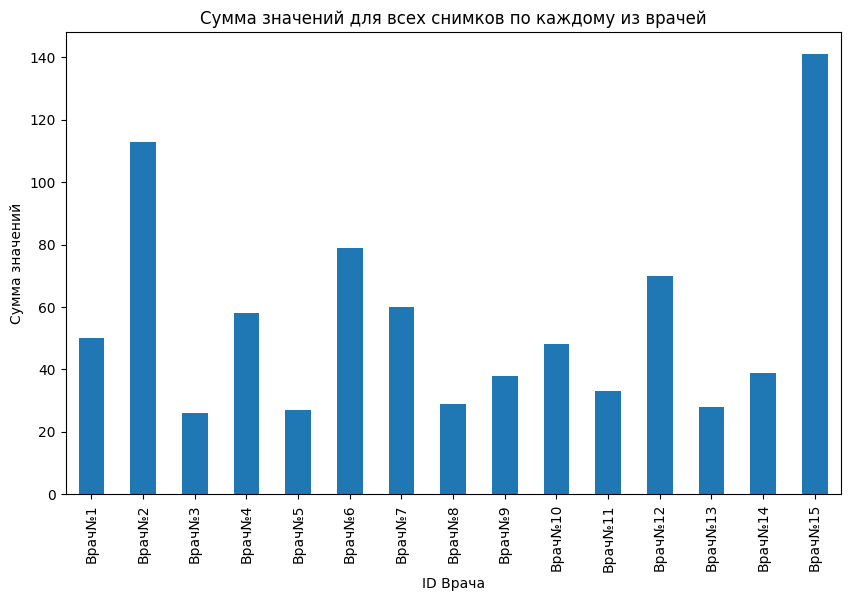

In [31]:
sum_by_doctor = df.sum()

plt.figure(figsize=(10, 6))
sum_by_doctor.plot(kind="bar")
plt.xlabel("ID Врача")
plt.ylabel("Сумма значений")
plt.title("Сумма значений для всех снимков по каждому из врачей")
plt.show()

In [32]:
average_labels = df.mean(axis=1)
deviation_from_mean = df.sub(average_labels, axis=0).abs().mean(axis=0)

# Среднее отклонение от усредненной разметки
deviation_from_mean

Врач№1     0.117540
Врач№2     0.211880
Врач№3     0.106918
Врач№4     0.144095
Врач№5     0.116841
Врач№6     0.168553
Врач№7     0.153878
Врач№8     0.145073
Врач№9     0.116143
Врач№10    0.121454
Врач№11    0.122991
Врач№12    0.140741
Врач№13    0.110552
Врач№14    0.124948
Врач№15    0.245702
dtype: float64

In [33]:
# Средняя ковариация с разметками других врачей
covariances = df.corr().mean(axis=0)
covariances

Врач№1     0.425707
Врач№2     0.307039
Врач№3     0.394424
Врач№4     0.322743
Врач№5     0.328782
Врач№6     0.312953
Врач№7     0.297679
Врач№8     0.143105
Врач№9     0.384255
Врач№10    0.384297
Врач№11    0.317238
Врач№12    0.392694
Врач№13    0.376615
Врач№14    0.336404
Врач№15    0.316465
dtype: float64

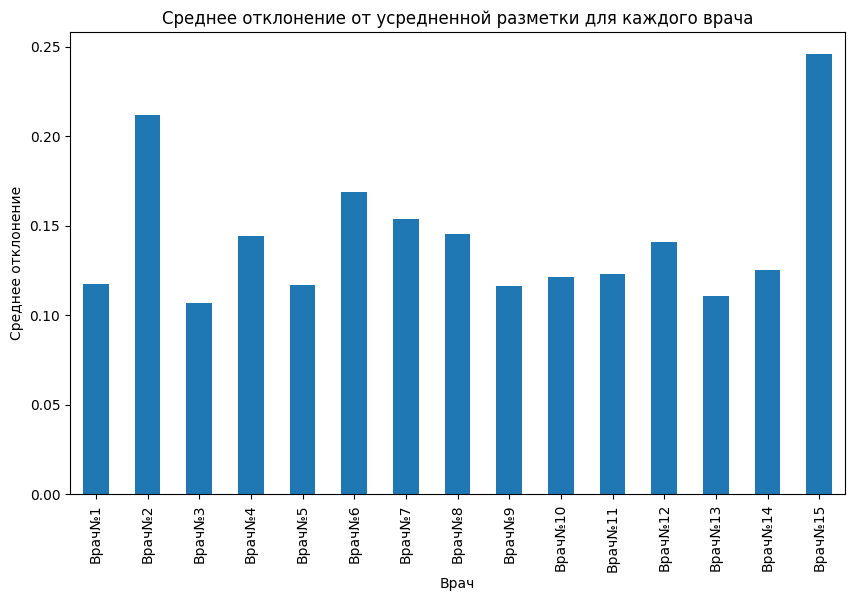

In [34]:
# Гистограмма среднего отклонения от усредненной разметки

plt.figure(figsize=(10, 6))
deviation_from_mean.plot(kind="bar")
plt.title("Среднее отклонение от усредненной разметки для каждого врача")
plt.xlabel("Врач")
plt.ylabel("Среднее отклонение")
plt.show()

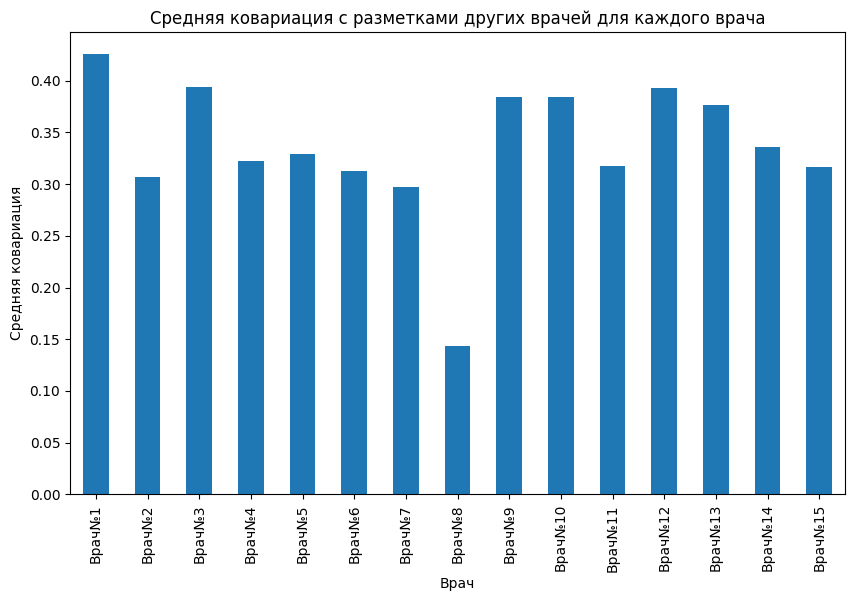

In [35]:
# Гистограмма средней ковариации с разметками других врачей

plt.figure(figsize=(10, 6))
covariances.plot(kind="bar")
plt.title("Средняя ковариация с разметками других врачей для каждого врача")
plt.xlabel("Врач")
plt.ylabel("Средняя ковариация")
plt.show()

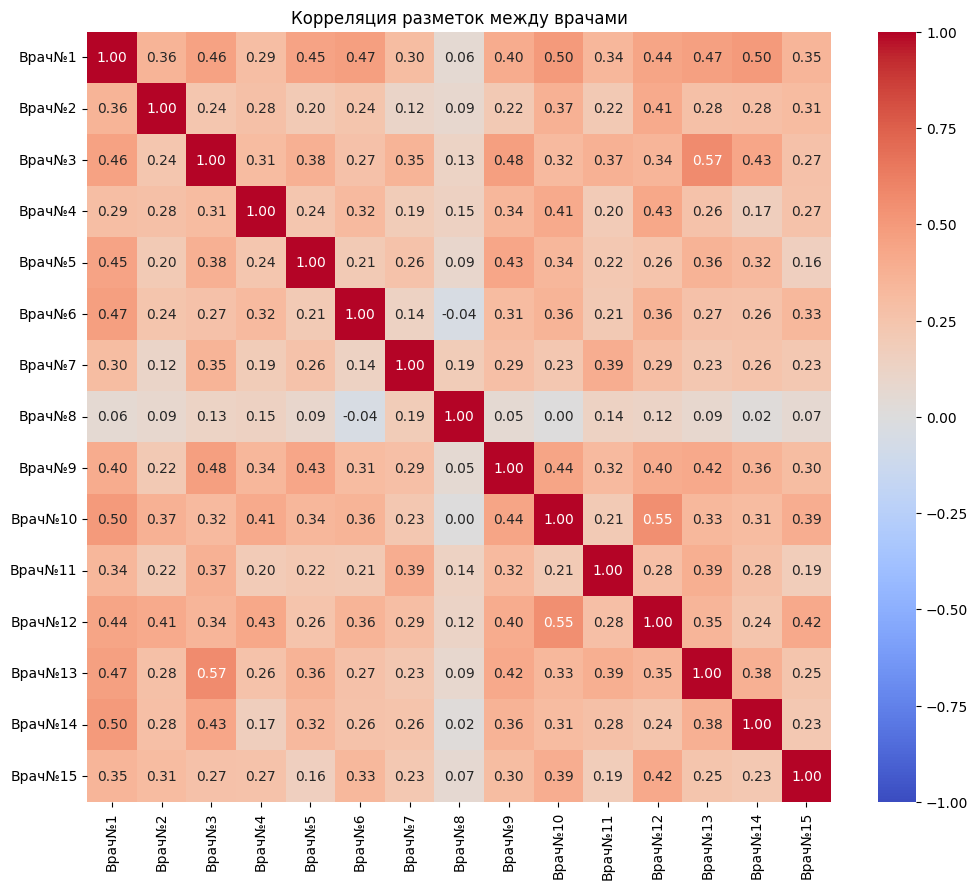

In [36]:
# Построение матрицы корреляции
correlation_matrix = df.corr()

# Тепловая карта корреляции между разметками врачей
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Корреляция разметок между врачами")
plt.show()

# Задание 2

- Отберите худших врачей по каждой из патологий. 
- Комментарий: Необходимо описать принцип отбора

## Решение по рассчитанным критериям

Для отбора худших врачей по каждой из патологий мы можем использовать два критерия, которые уже были рассчитаны:

1. **Среднее отклонение от усредненной разметки**: врачи с наибольшим средним отклонением от усредненной разметки считаются худшими, так как их разметка значительно отличается от консенсуса.
2. **Средняя ковариация с разметками других врачей**: врачи с наименьшей средней ковариацией с разметками других врачей считаются худшими, так как их разметка менее согласованна с разметками остальных.

### Принцип отбора

1. **Отбор по среднему отклонению**: врачи с наибольшими значениями среднего отклонения от усредненной разметки.
2. **Отбор по средней ковариации**: врачи с наименьшими значениями средней ковариации с разметками других врачей.

In [37]:
print("Отбор худших врачей по среднему отклонению")
worst_by_deviation = deviation_from_mean.sort_values(ascending=False).head()
worst_by_deviation

Отбор худших врачей по среднему отклонению


Врач№15    0.245702
Врач№2     0.211880
Врач№6     0.168553
Врач№7     0.153878
Врач№8     0.145073
dtype: float64

In [38]:
print("Отбор худших врачей по средней ковариации")
worst_by_covariance = covariances.sort_values(ascending=True).head()
worst_by_covariance

Отбор худших врачей по средней ковариации


Врач№8     0.143105
Врач№7     0.297679
Врач№2     0.307039
Врач№6     0.312953
Врач№15    0.316465
dtype: float64

## Решение по дополнительным критериям

Помимо среднего отклонения и средней ковариации, можно рассмотреть несколько других методов для оценки качества разметки каждого врача и отбора худших:

1. Критерий консистентности (стабильности): 
  - Дисперсия разметок врача: высокая дисперсия может указывать на нестабильность в оценках врача.
  - Коэффициент вариации: отношение стандартного отклонения к среднему значению разметок врача.

In [39]:
print("худшие врачи по дисперсии разметок")
worst_by_variance = df.var(axis=0).sort_values(ascending=False).head()
worst_by_variance

худшие врачи по дисперсии разметок


Врач№15    0.208657
Врач№2     0.181157
Врач№6     0.138479
Врач№12    0.125478
Врач№7     0.110195
dtype: float64

In [40]:
print("худшие врачи по коэффициенту вариации:")
worst_by_cv_rating = (
    (df.mean(axis=0) / df.std(axis=0)).sort_values(ascending=False).head()
)
worst_by_cv_rating

худшие врачи по коэффициенту вариации:


Врач№15    0.647119
Врач№2     0.556587
Врач№6     0.445058
Врач№12    0.414282
Врач№7     0.378924
dtype: float64

# Задание 3

- Сформируйте итоговую разметку (для каждого снимка только одно значение 0 или 1). А также уверенность в разметке каждого снимка. 
- Комментарий: критерий уверенности в разметке предлагается выбрать самим

## Формирование итоговой разметки

- По преобладающему значению: если большинство врачей отметили 1, то результат будет 1, иначе 0.
- Среднее значение: использование среднего значения оценок врачей в качестве вероятности наличия патологии.

## Рассчет уверенности в разметке каждого снимка

- На основании доли врачей, указавших наличие паталогии.
- По среднему значению: приведение среднего значения к диапазону [0, 1].

In [41]:
# Формирование итоговой разметки по преобладающему значению и рассчет уверенности на основании доли врачей, указавших наличие паталогии.

df_majority = df.copy()


def final_label_on_majority(row):
    # Простое голосование: если больше половины врачей отметили 1, то разметка будет 1, иначе 0
    threshold = len(row) // 2  # Порог для большинства голосов
    final_label = 1 if sum(row) > threshold else 0

    # Уверенность в разметке (доля врачей, указавших наличие паталогии)
    confidence = sum(row) / len(row)

    return final_label, confidence


# Применяем функцию к каждой строке (снимку)
df_majority["Итоговая разметка"], df_majority["Коэф. уверенности"] = zip(
    *df_majority.iloc[:, 1:].apply(final_label_on_majority, axis=1)
)

df_majority[["Итоговая разметка", "Коэф. уверенности"]]

,Итоговая разметка,Коэф. уверенности
0,0,0.142857
1,0,0.000000
2,0,0.071429
3,0,0.000000
4,0,0.214286
...,...,...
472,0,0.000000
473,0,0.285714
474,0,0.000000
475,0,0.000000


In [42]:
# Формирование итоговой разметки и рассчет уверенности по среднему значению

df_mean = df.copy()


# Формирование итоговой разметки и уверенности
def final_label_on_mean(row):
    mean_rating = np.mean(row)
    final_label = 1 if mean_rating >= 0.5 else 0
    confidence = (
        abs(mean_rating - 0.5) * 2
    )  # Конвертируем уверенность в диапазон [0, 1]
    return final_label, confidence


# Применяем функцию к каждой строке (снимку)
df_mean["Итоговая разметка"], df_mean["Коэф. уверенности"] = zip(
    *df_mean.iloc[:, 1:].apply(final_label_on_mean, axis=1)
)

df_mean[["Итоговая разметка", "Коэф. уверенности"]]

,Итоговая разметка,Коэф. уверенности
0,0,0.714286
1,0,1.000000
2,0,0.857143
3,0,1.000000
4,0,0.571429
...,...,...
472,0,1.000000
473,0,0.428571
474,0,1.000000
475,0,1.000000


# Задание 4

- Оцените итоговое качество разметки по каждой из патологий.
- Комментарий: необходимо получить численную оценку, а также можно привести комментарии с доводами о качестве разметки

# Описание решения

Итоговое качество разметки будем интерпретировать как степень согласованности оценок респондентов. Для оценки этого показателя рассчитаем статистическую меру согласия с помощью каппы Флейса.

## Каппа Флейса (Fleiss' Kappa)

- Каппа Флейса - это статистическая мера для оценки надежности согласия между фиксированным числом респондентов при присвоении категориальных рейтингов ряду элементов или классификации элементов.
- Она рассчитывается по формуле: 
$$k = \frac{p_0 - p_e}{1 - p_e}$$
где $p_0$ - наблюдаемая доля согласия, $p_e$ - ожидаемая доля согласия

In [43]:
from statsmodels.stats.inter_rater import fleiss_kappa

ratings = df.to_numpy()


# Преобразование данных в формат для каппы Флейса
def prepare_fleiss_kappa_df(ratings):
    n_categories = 2  # 2 категории (0 и 1)
    n_items, n_raters = ratings.shape
    table = np.zeros((n_items, n_categories), dtype=int)

    for i in range(n_items):
        for j in range(n_raters):
            rating = ratings[i, j]
            table[i, rating] += 1

    return table


table = prepare_fleiss_kappa_df(ratings)

# Вычисление каппы Флейса
kappa = fleiss_kappa(table)
print(f"Fleiss' kappa: {kappa}")

Fleiss' kappa: 0.2591132582884047


### Интерпретация результата

- Для интерпретации коэффициента каппы Флейса можно использовать разные инструменты. В данной работе будет применяться таблица Лэндиса и Коха (1977):

| Коэф. каппы Флейса | Уровень согласия |
| ------------------ | ---------------- |
| 0.81 – 1.00            | Почти идеальное  |
| 0.61 – 0.80	            | Существенное     |
| 0.41 – 0.60	            | Умеренное        |
| 0.21 – 0.40	             | Незначительное   |
| 0.01 – 0.20	              | Слабое           |
| < 0                | Пренебрежимо малое      |

- Рассчитанный коэффициент каппы Флейса оказался равным k = 0.2591132582884047, он принадлежит диапазону [0.21, 0.40], что соответствует незначительному уровню согласованности между врачами.
- Таким образом, качество разметки оказалось на незначительном уровне. Для окончательного вывления паталогии необходимо провести дополнительное исследование.